In [15]:
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras import Input, Model
from keras.datasets import mnist
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

# Normal Autoencoder

In [3]:
encoding_dim = 15 
input_img = Input(shape=(784,))
# encoded representation of input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# decoded representation of code 
decoded = Dense(784, activation='sigmoid')(encoded)
# Model which take input image and shows decoded images
autoencoder = Model(input_img, decoded)

2022-11-16 12:46:22.257812: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# This model shows encoded images
encoder = Model(input_img, encoded)
# Creating a decoder model
encoded_input = Input(shape=(encoding_dim,))
# last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [5]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


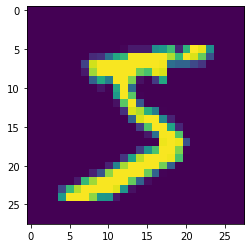

In [7]:
plt.imshow(x_train[0].reshape(28,28))


In [8]:
autoencoder.fit(x_train, x_train,
                epochs=15,
                batch_size=256,
                validation_data=(x_test, x_test))


Epoch 1/15
235/235 [==============================] - 2s 6ms/step - loss: 0.3108 - val_loss: 0.2187
Epoch 2/15
235/235 [==============================] - 2s 7ms/step - loss: 0.1966 - val_loss: 0.1805
Epoch 3/15
235/235 [==============================] - 2s 7ms/step - loss: 0.1725 - val_loss: 0.1641
Epoch 4/15
235/235 [==============================] - 2s 7ms/step - loss: 0.1597 - val_loss: 0.1538
Epoch 5/15
235/235 [==============================] - 1s 6ms/step - loss: 0.1514 - val_loss: 0.1472
Epoch 6/15
235/235 [==============================] - 1s 6ms/step - loss: 0.1465 - val_loss: 0.1436
Epoch 7/15
235/235 [==============================] - 2s 7ms/step - loss: 0.1436 - val_loss: 0.1412
Epoch 8/15
235/235 [==============================] - 2s 7ms/step - loss: 0.1415 - val_loss: 0.1394
Epoch 9/15
235/235 [==============================] - 1s 6ms/step - loss: 0.1398 - val_loss: 0.1379
Epoch 10/15
235/235 [==============================] - 2s 8ms/step - loss: 0.1383 - val_loss: 0.1364

# Normal Autoencoder Results

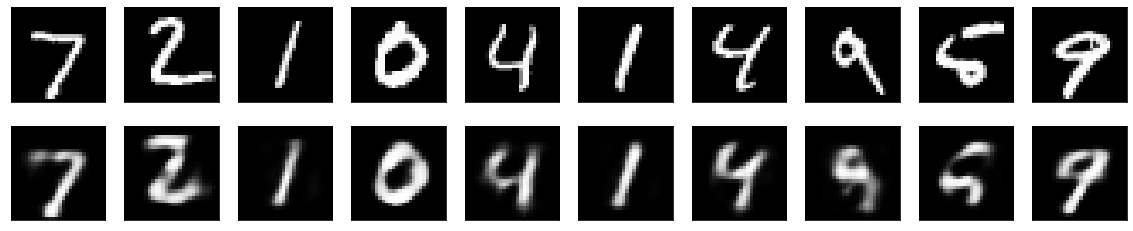

In [9]:
encoded_img = encoder.predict(x_test)
decoded_img = decoder.predict(encoded_img)
plt.figure(figsize=(20, 4))
for i in range(10):
    # Display original
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, 10, i + 1 + 10)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [10]:
from keras.models import Sequential

# Deep Autoencoder

In [11]:

model = Sequential()

# encoder network
model.add(Conv2D(30, 3, activation= 'relu', padding='same', input_shape = (28,28,1)))
model.add(MaxPooling2D(2, padding= 'same'))
model.add(Conv2D(15, 3, activation= 'relu', padding='same'))
model.add(MaxPooling2D(2, padding= 'same'))

#decoder network
model.add(Conv2D(15, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(30, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(1,3,activation='sigmoid', padding= 'same')) # output layer
model.compile(optimizer= 'adam', loss = 'binary_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 30)        300       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 15)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 15)          2040      
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 15)       0

In [12]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
model.fit(x_train, x_train,
                epochs=15,
                batch_size=128,
                validation_data=(x_test, x_test))

Epoch 1/15
469/469 [==============================] - 79s 168ms/step - loss: 0.1290 - val_loss: 0.0792
Epoch 2/15
469/469 [==============================] - 80s 171ms/step - loss: 0.0775 - val_loss: 0.0748
Epoch 3/15
469/469 [==============================] - 79s 169ms/step - loss: 0.0746 - val_loss: 0.0730
Epoch 4/15
469/469 [==============================] - 77s 165ms/step - loss: 0.0730 - val_loss: 0.0720
Epoch 5/15
469/469 [==============================] - 90s 192ms/step - loss: 0.0721 - val_loss: 0.0710
Epoch 6/15
469/469 [==============================] - 79s 168ms/step - loss: 0.0713 - val_loss: 0.0704
Epoch 7/15
469/469 [==============================] - 72s 153ms/step - loss: 0.0707 - val_loss: 0.0699
Epoch 8/15
469/469 [==============================] - 71s 151ms/step - loss: 0.0703 - val_loss: 0.0694
Epoch 9/15
469/469 [==============================] - 85s 181ms/step - loss: 0.0698 - val_loss: 0.0692
Epoch 10/15
469/469 [==============================] - 74s 158ms/step - l

# Deep Autoencoder Results

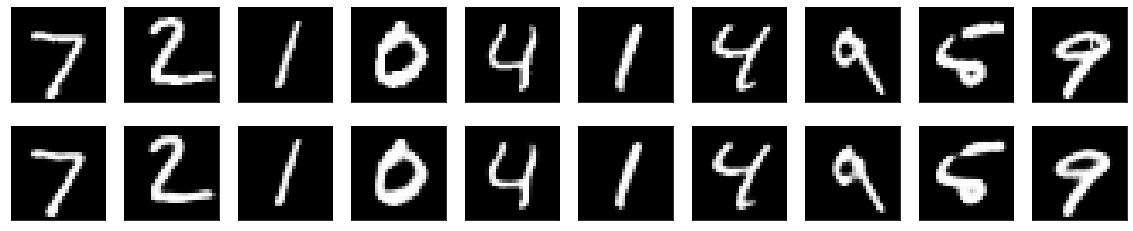

In [13]:
pred = model.predict(x_test)
plt.figure(figsize=(20, 4))
n=10
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(pred[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Test with Anomoly Images

(60000, 28, 28, 1)
(10000, 28, 28, 1)


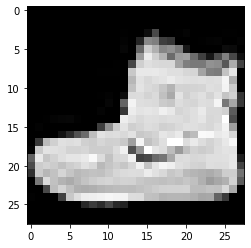

In [24]:
#load fashion data 
(fx_train, _), (fx_test, _) = fashion_mnist.load_data()
#preprocess data
fx_train = fx_train.astype('float32') / 255.
fx_test = fx_test.astype('float32') / 255.
fx_train = np.reshape(fx_train, (len(fx_train), 28, 28, 1))
fx_test = np.reshape(fx_test, (len(fx_test), 28, 28, 1))

#show the data 
plt.imshow(fx_train[0].reshape(28,28))
print(fx_train.shape)
print(fx_test.shape)



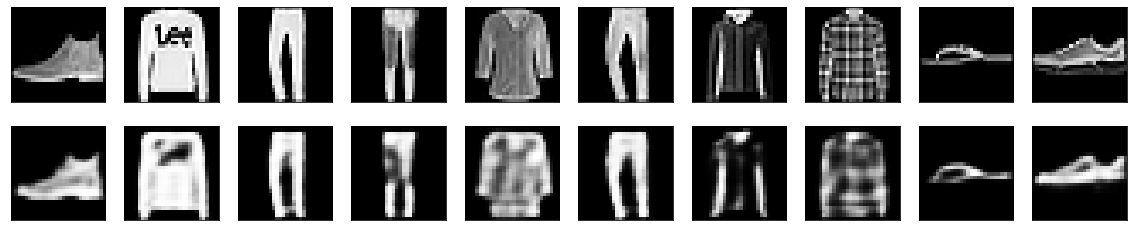

In [25]:
pred = model.predict(fx_test)
plt.figure(figsize=(20, 4))
n=10
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(fx_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(pred[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()